<a href="https://colab.research.google.com/github/alvinnebula/DecisionTree_MapReduce/blob/main/DecisionTreeClassifier_OriginalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree - Original Data

In [1]:
!pip install  pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Loading the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, OneHotEncoder
import seaborn as sns; sns.set_style("dark")
%matplotlib inline
import matplotlib.pyplot as plt
import janitor
from google.colab import drive
import os

#### Connecting to Google Drive

In [3]:
drive.mount('/content/drive')
cur_path = "/content/drive/MyDrive/Big Data/Project"
os.chdir(cur_path)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Cleaning

In [4]:
df = pd.read_csv("adult.csv").clean_names()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df["marital_relation"] = df["marital_status"] + "_" + df["relationship"]
df = df.drop(["sex","race","education_num", "native_country", "marital_status","relationship"], axis = 1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   occupation        32561 non-null  object
 5   capital_gain      32561 non-null  int64 
 6   capital_loss      32561 non-null  int64 
 7   hours_per_week    32561 non-null  int64 
 8   income            32561 non-null  object
 9   marital_relation  32561 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df["income"] = df["income"].replace(["<=50K",">50K"], [0,1])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
train, test = train_test_split(df, random_state = 420, train_size = 0.85, stratify = df["income"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
train_0 = train[train["income"] == 0]
train_0 = train_0.drop_duplicates()
train_1 = train[train["income"] == 1]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
train_new = pd.concat([train_0, train_1], axis = 0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
x_train, y_train = train_new.drop("income", axis = 1), train_new["income"]
x_test, y_test = test.drop("income", axis = 1), test["income"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Exploratory Data Analysis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


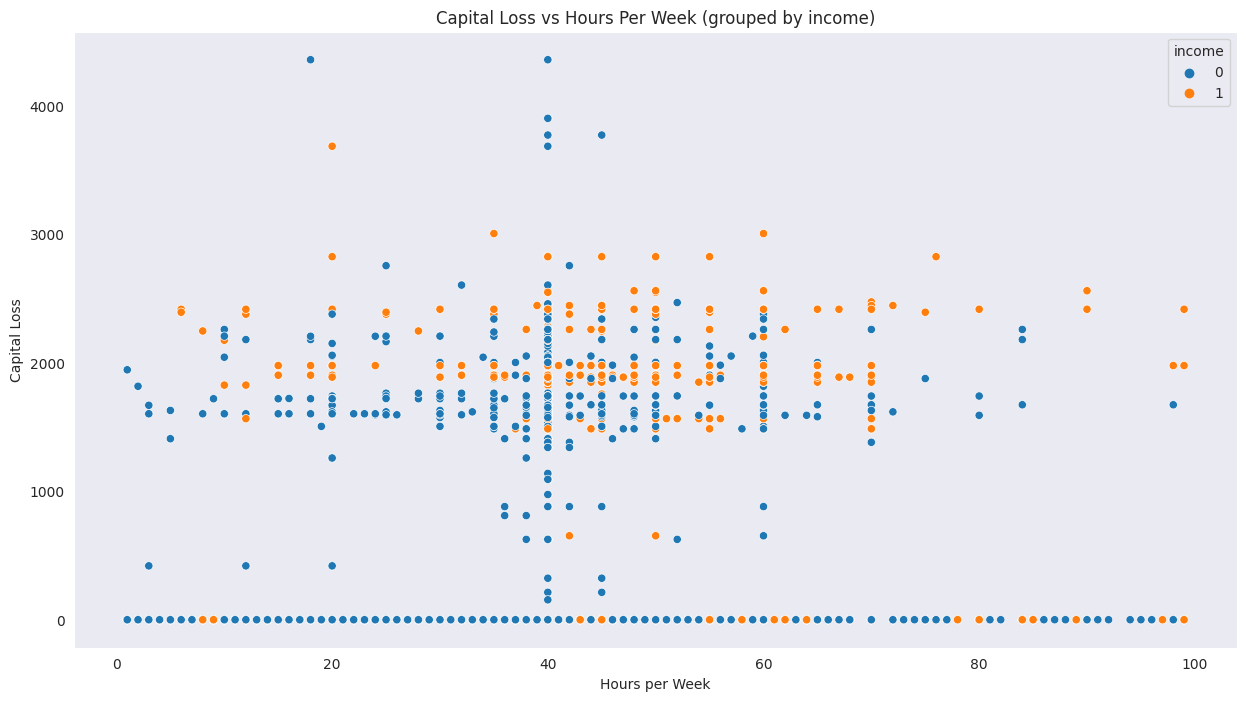

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(y = "capital_loss", x = "hours_per_week", data = train, hue = "income")
plt.title("Capital Loss vs Hours Per Week (grouped by income)")
plt.xlabel("Hours per Week")
plt.ylabel("Capital Loss")
plt.show();

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


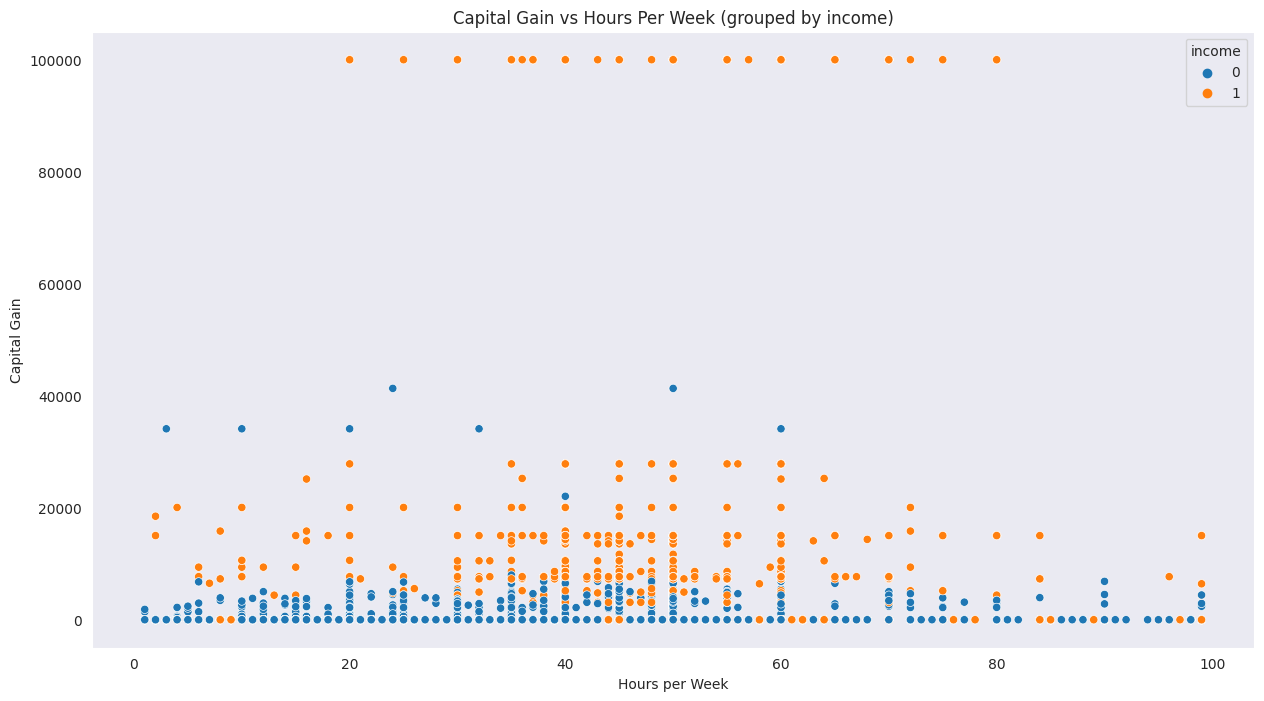

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(y = "capital_gain", x = "hours_per_week", data = train, hue = "income")
plt.title("Capital Gain vs Hours Per Week (grouped by income)")
plt.xlabel("Hours per Week")
plt.ylabel("Capital Gain")
plt.show();

In [15]:
def cat_chart(df, col):
  col_title = col.title()
  train_new = train.groupby([col, "income"], as_index = False).size()
  plt.figure(figsize=(15,8))
  sns.barplot(x = col, y = "size",data = train_new, hue = "income")
  plt.title("Income Analysis via " + col_title)
  plt.xlabel(col_title)
  plt.ylabel("Frequency")
  plt.xticks(rotation = 90)
  plt.show();

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


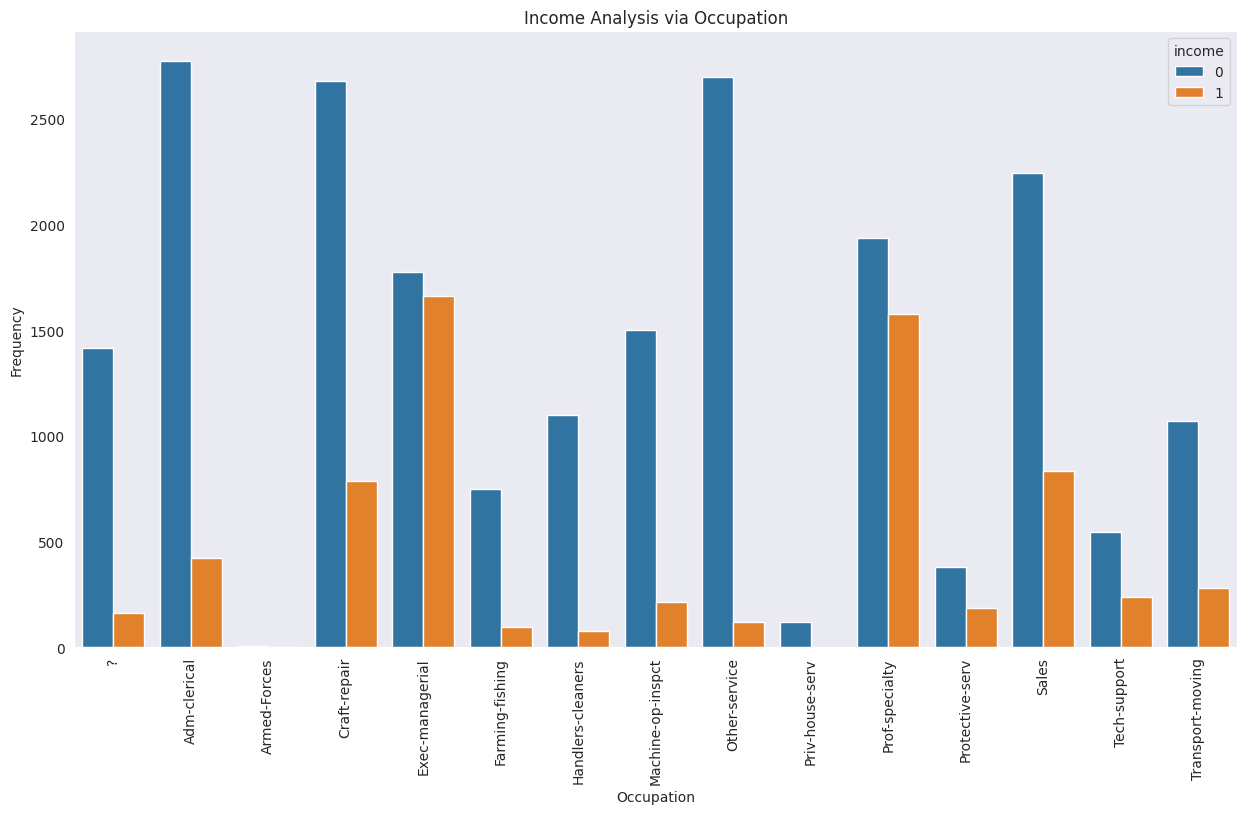

In [16]:
cat_chart(train, "occupation")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


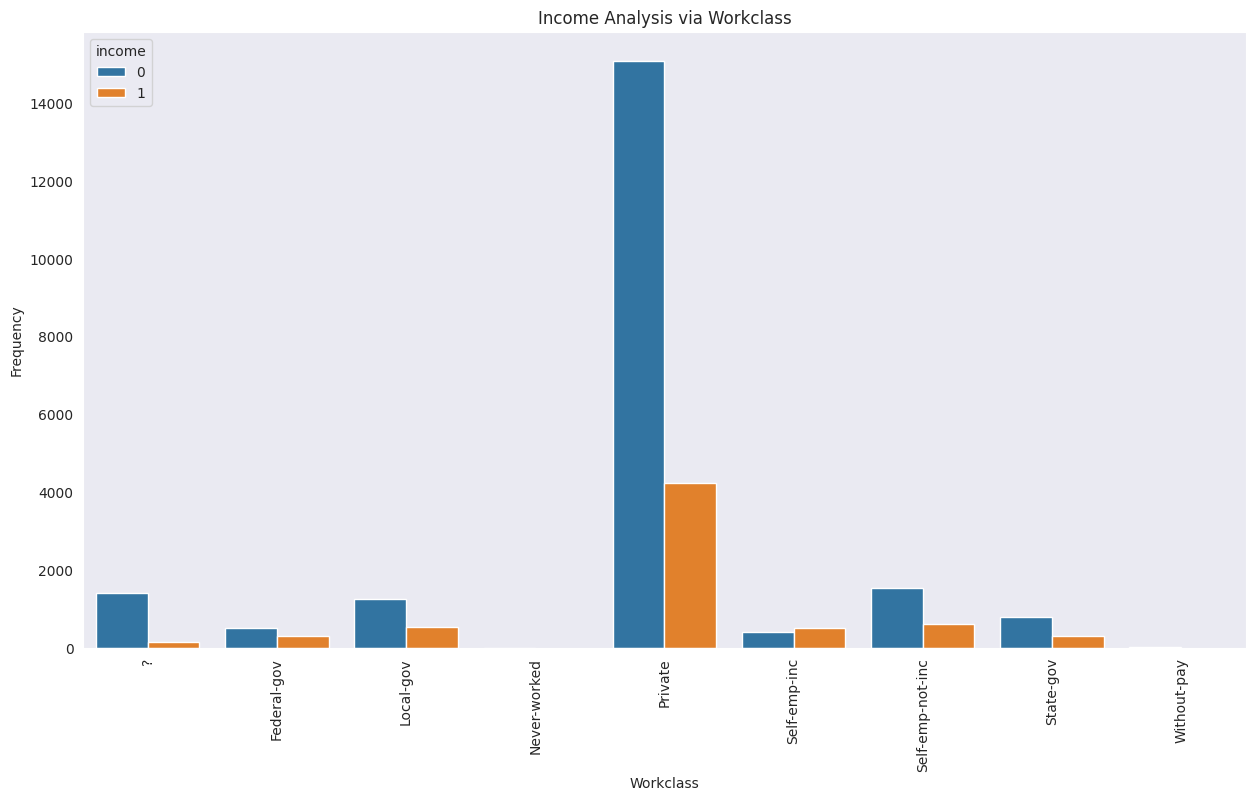

In [17]:
cat_chart(df, "workclass")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


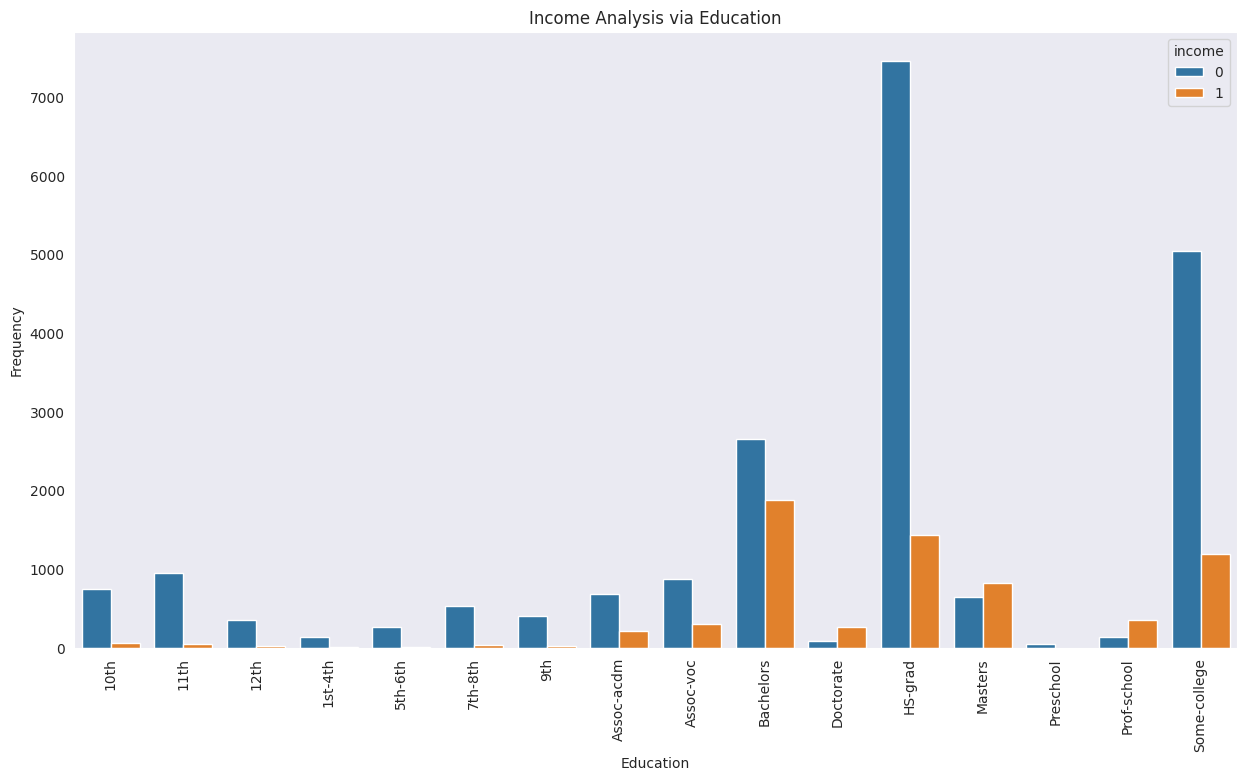

In [18]:
cat_chart(train, "education")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


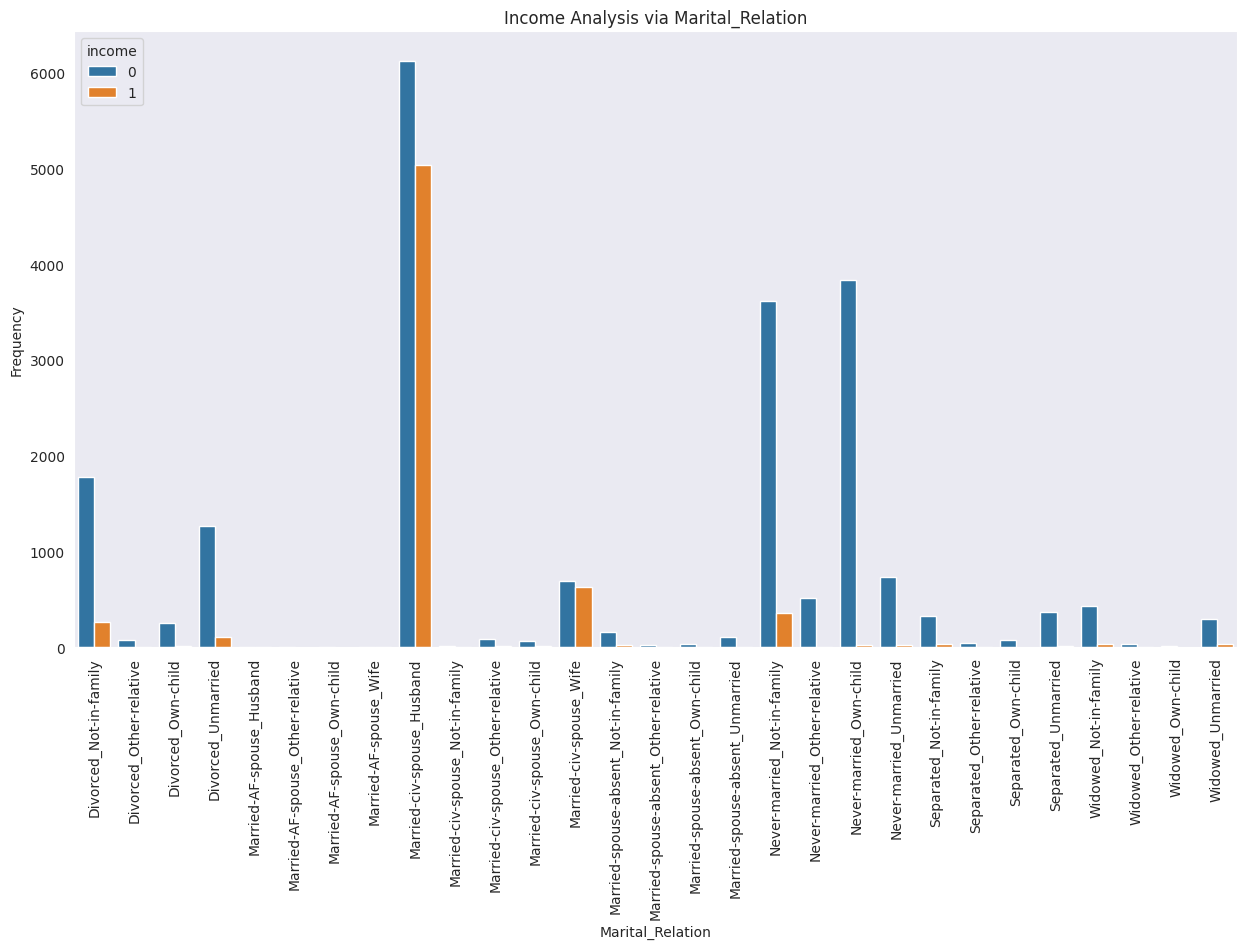

In [19]:
cat_chart(train, "marital_relation")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


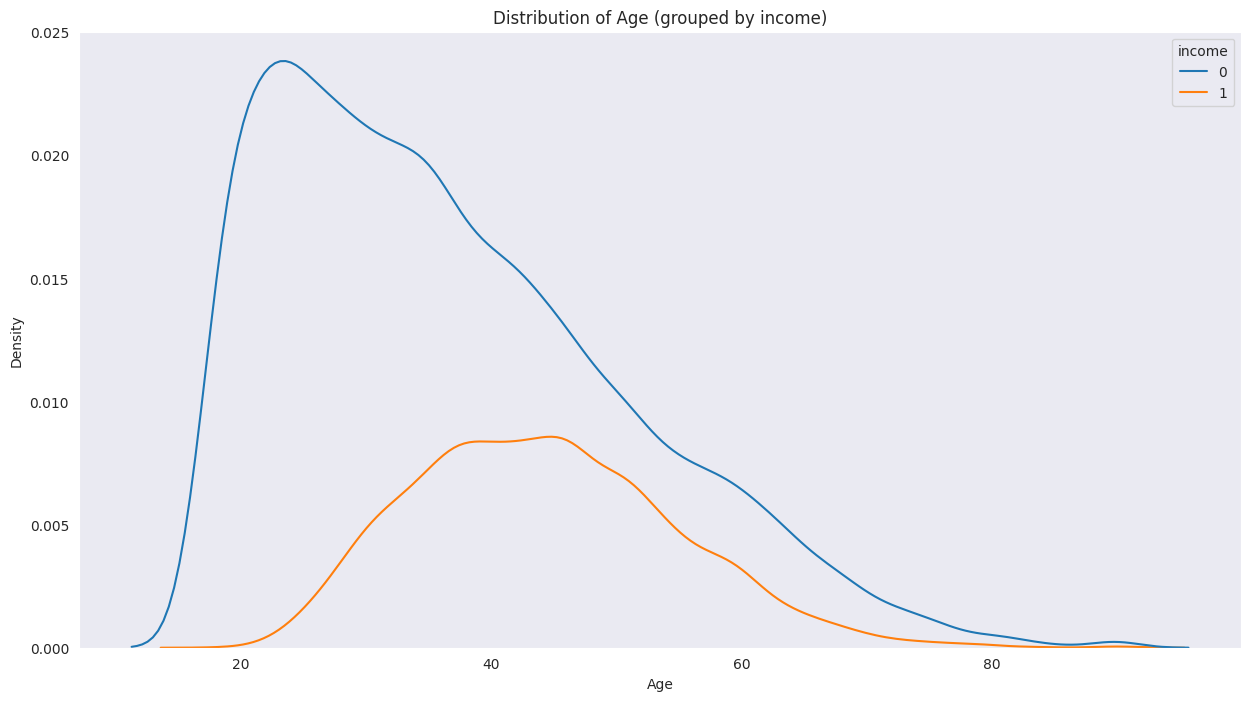

In [20]:
plt.figure(figsize = (15,8))
sns.kdeplot(x = "age", hue = "income", data = train)
plt.title("Distribution of Age (grouped by income)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show();

### Feature Engineering

In [21]:
num = []
cat = []
stri = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        stri.append(col)
    elif is_categorical_dtype(x_train[col]):
        cat.append(col)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
num, stri, cat

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'],
 ['workclass', 'education', 'occupation', 'marital_relation'],
 [])

In [23]:
df["education"].unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [24]:
educ = ["education"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
stri.remove("education")
num, stri, cat

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'],
 ['workclass', 'occupation', 'marital_relation'],
 [])

In [26]:
min_max = MinMaxScaler()
ohe = OneHotEncoder()
ordi = OrdinalEncoder(categories = [["Preschool", "1st-4th","5th-6th", "7th-8th", "9th", "10th", 
                                            "11th", "12th", "HS-grad", "Some-college",
                                            "Assoc-voc","Assoc-acdm","Bachelors", "Masters","Prof-school","Doctorate"]])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def column_transform(df, columns):
    new_df = df.copy()
    for col in columns:
        # num ~ [0,1]
        if col in num:
            ct = ColumnTransformer([("min_max", min_max, [col])])
            new_df[col + "_scaled"] = ct.fit_transform(df)
            continue
        # stri ~ {0,1}    
        elif col in stri:
            elements = sorted(df[col].unique())
            ct2 = ColumnTransformer([("ohe", ohe, [col])])
            if len(elements) > 2:
                x = ct2.fit_transform(df).toarray()
            elif len(elements) <= 2:
                x = np.array(ct2.fit_transform(df))
            for i in range(len(elements)):
                new_df[col + "_" + elements[i].lower()] = x[:,i]
        # depends on ord class
        elif col in educ:
            ct3 = ColumnTransformer([("ord", ordi, [col])])
            x = ct3.fit_transform(df)
            new_df[col + "_new"] = x
            continue
    new_df = new_df.drop(columns, axis = 1)
    return new_df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
new_train_data = column_transform(x_train, list(x_train.columns))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
new_train_data["income"] = train_new["income"]

#new_train_data['education_new']
# 'age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
new_train_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_scaled,workclass_?,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,...,marital_relation_never-married_unmarried,marital_relation_separated_not-in-family,marital_relation_separated_other-relative,marital_relation_separated_own-child,marital_relation_separated_unmarried,marital_relation_widowed_not-in-family,marital_relation_widowed_other-relative,marital_relation_widowed_own-child,marital_relation_widowed_unmarried,income
12532,0.424658,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17744,0.616438,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
30386,0.739726,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14465,0.191781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18215,0.205479,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [31]:
def column_fit_transform(train, other, columns):
    new_df = other.copy()
    for col in columns:
        # minmax
        if col in num:
            ct = ColumnTransformer([("min_max", min_max, [col])])
            ct.fit(train)
            new_df[col + "_scaled"] = ct.transform(other)
        # ohe
        elif col in stri:
            elements = sorted(other[col].unique())
            ct2 = ColumnTransformer([("ohe", ohe, [col])])
            if len(elements) > 2:
                ct2.fit(train)
                x = ct2.transform(other).toarray()
            elif len(elements) <= 2:
                ct2.fit(train)
                x = np.array(ct2.transform(other))
            for i in range(len(elements)):
                new_df[col + "_" + elements[i].lower()] = x[:,i]
        # ord
        elif col in educ:
            ct3 = ColumnTransformer([("ord", ordi, [col])])
            ct3.fit(train)
            x = ct3.transform(other)
            new_df[col + "_new"] = x
        
    new_df = new_df.drop(columns, axis = 1)
    return new_df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
new_test_data = column_fit_transform(x_train, x_test, x_train.columns)
test_col, train_col = list(new_test_data.columns), list(new_train_data.columns)
missing = list(set(train_col).difference(set(test_col)))
for miss in missing:
    new_test_data[missing] = 0.0
new_test_data = new_test_data.drop("income", axis = 1)
new_test_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_scaled,workclass_?,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,...,marital_relation_separated_not-in-family,marital_relation_separated_other-relative,marital_relation_separated_own-child,marital_relation_separated_unmarried,marital_relation_widowed_not-in-family,marital_relation_widowed_other-relative,marital_relation_widowed_unmarried,marital_relation_married-af-spouse_other-relative,marital_relation_married-af-spouse_own-child,marital_relation_widowed_own-child
22431,0.589041,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20864,0.013699,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18188,0.095890,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16329,0.273973,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16072,0.219178,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Decision Tree Algorithm

In [33]:
## function for calculating entropy
def getEntropy(counts):
    percentages = counts/np.sum(counts)

    entr = 0
    for per in percentages:
        if per == 0:
            continue
        entr = entr - (per*np.log2(per))
    return entr

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# function for calculating entropy for each variable
def dataEntropy(data):
    
    high_income = data[data['income'] == 1].shape[0]
    low_income = data[data['income'] == 0].shape[0]
    
    result = getEntropy([low_income,high_income])
    return result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# function for obtaining aggregated entropy
def dataGivenEntropy(dataX, dataY):
    entrX = dataEntropy(dataX)
    entrY = dataEntropy(dataY)
    nX = dataX.shape[0]
    nY = dataY.shape[0]
    n = nX + nY
    result = nX/n * entrX + nY/n * entrY
    return result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# function for calculating information gain to decide which column to split on
def infoGain(data, dataX, dataY):
    result = dataEntropy(data) - dataGivenEntropy(dataX, dataY)
    return result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# function for calculating gini
def getGini(counts):
    percentages = counts/np.sum(counts)
    gini = 1-np.sum(percentages**2)
    return gini

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# function for calculating the best split
def findBestSplit(data, label):
    minEntropy = 1
    colSelected = str()
    thresh_value = 0
    dataX_found,dataY_found = None, None
    for col in list(data.columns):
      if col != label:
        # make the split 

        if len(data[col].unique()) > 2:
          max = data[col].max()
          threshold = np.linspace(0,max,30)[1:-1]
          infoGainList = []

          # for 28 different thresholds, calculate the info-gain
          for i in range(len(threshold)):
            dataX = data[data[col] > threshold[i]]
            dataY = data[data[col] <= threshold[i]]
            infoGainList.append(infoGain(data, dataX, dataY))

          # get the max info-gain
          idx = np.argmax(infoGainList)
          dataX = data[data[col] > threshold[idx]]
          dataY = data[data[col] <= threshold[idx]]
          thresh = threshold[idx]

        else:
          thresh = 0.5
          dataX = data[data[col] > thresh]
          dataY = data[data[col] <= thresh]
            
          
        entr = dataGivenEntropy(dataX, dataY)
        
        
        if entr < minEntropy:
            minEntropy = entr
            colSelected = col
            dataX_found = dataX
            dataY_found = dataY
            thresh_value = thresh
        

    return colSelected, minEntropy, dataX_found, dataY_found, thresh_value

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
findBestSplit(new_train_data, 'income')[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'marital_relation_married-civ-spouse_husband'

In [40]:
# class for recording branch information for each split
class Branch:
    no=0
    depth=1
    column=''
    entropy=0
    value = []
    samples = 0
    gini = 0
    thresh = 0
    branch_positive=None
    branch_negative=None
    positive=0
    negative=0
    num_cols = 0
    col_names = []

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
## function for building the decision tree for each split
number = 0
def decisionTreeInner(data, label, depth, max_depth, max_features, min_samples_split, min_samples_leaf):
    global number
    branch = Branch()
    branch.no = number
    number += 1
    branch.depth = depth
    
    branch.samples = data.shape[0]
    positive = data[data[label]==1].shape[0]
    negative = data[data[label]==0].shape[0]
    
    branch.value= [negative, positive]
    
    branch.gini = getGini(branch.value)
    
    bestSplit = findBestSplit(data, label)
    
    branch.column = bestSplit[0]
    branch.col_names.append(branch.column)
    cols = list(set(branch.col_names))
    branch.num_cols = len(cols)
    branch.entropy = bestSplit[1]
    newEntropy = bestSplit[1]
    dataNegative = bestSplit[2]
    dataPositive = bestSplit[3]
    branch.thresh = bestSplit[4]

    unbalanced_0 = branch.value[0]/(branch.value[0] + branch.value[1]) 
    unbalanced_1 = branch.value[1]/(branch.value[0] + branch.value[1])
    
    if len(cols) < max_features:
        if depth == max_depth or branch.column == "" or branch.samples <= min_samples_split or (len(dataNegative) <= min_samples_leaf and len(dataPositive) <= min_samples_leaf) or (unbalanced_0 > 0.95 and branch.samples <= 1000) or (unbalanced_1 > 0.95 and branch.samples <= 1000):
          
            branch.positive = number
            number +=1
            branch.negative = number
            number +=1   
            branch.column = ""
    
            return branch
        
        # next step
        else:
            
            #dataNegative = bestSplit[2]
            branch.branch_negative = decisionTreeInner(dataNegative, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
            
            #dataPositive = bestSplit[3]
            branch.branch_positive = decisionTreeInner(dataPositive, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

            return branch
    else:
        
        if depth == max_depth or branch.column == "" or branch.samples <= min_samples_split or (len(dataNegative) <= min_samples_leaf and len(dataPositive) <= min_samples_leaf) or (unbalanced_0 > 0.95 and branch.samples <= 1000) or (unbalanced_1 > 0.95 and branch.samples <= 1000):
            
            branch.positive = number
            number +=1
            branch.negative = number
            number +=1   
            branch.column = ""
            
            return branch
        
        else:
            if "" in cols:
              cols.remove("")
            cols.append("income")
            
            #dataNegative = bestSplit[2]
            dataNegative = dataNegative[cols]
            
            branch.branch_negative = decisionTreeInner(dataNegative, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
            
            #dataPositive = bestSplit[3]
            dataPositive= dataPositive[cols]
            
            branch.branch_positive = decisionTreeInner(dataPositive, label, depth+1, max_depth=max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
            cols.remove("income")
            return branch


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
## function for creating the decision tree classifier.
def decision_tree(data, label, max_depth, max_features, min_samples_split, min_samples_leaf):
    class Branch:
      no=0
      depth=1
      column=''
      entropy=0
      value = []
      samples = 0
      gini = 0
      thresh = 0
      branch_positive=None
      branch_negative=None
      positive=0 
      negative=0
      num_cols = 0
      col_names = []
      
    number = 0
    entropy = dataEntropy(data)
    columns = []
    tree = decisionTreeInner(data, label, 0, max_depth = max_depth, max_features = max_features, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
    return tree

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
import warnings
warnings.filterwarnings('ignore')
import time
start=time.time()
my_dt = decision_tree(new_train_data, 'income', max_depth=3, max_features = 10, min_samples_split = 400, min_samples_leaf = 250)
print(round(time.time()-start, 2), 'seconds')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


17.36 seconds


In [44]:
def get_dot_data_innner(branch:Branch, classes, dot_data):
    if branch.value[0]<branch.value[1]:
        the_class=classes[0]
    else:
        the_class=classes[1]
    if branch.branch_positive:
        dot_data=dot_data+'{} [label=<{} le {:.2f}<br/>entropy = {:.3f}<br/>samples = {}<br/>value = {}<br/>class = {}> , fillcolor="#FFFFFFFF"] ;\r\n'.format(
            branch.no, branch.column, branch.thresh, branch.entropy, branch.samples, branch.value, the_class)
    else:
        dot_data=dot_data+'{} [label=<entropy = {:.3f}<br/>samples = {}<br/>value = {}<br/>class = {}> , fillcolor="#FFFFFFFF"] ;\r\n'.format(
            branch.no, branch.entropy, branch.samples, branch.value, the_class)
    if branch.branch_negative:
        dot_data=dot_data+'{} -> {} [labeldistance=2.5, labelangle=45, headlabel="no"]; \r\n'.format(branch.no, branch.branch_negative.no)
        dot_data=get_dot_data_innner(branch.branch_negative, classes, dot_data)
        
    if branch.branch_positive:
        dot_data=dot_data+'{} -> {} [labeldistance=1.5, labelangle=45, headlabel="yes"]; \r\n'.format(branch.no, branch.branch_positive.no)
        dot_data=get_dot_data_innner(branch.branch_positive, classes, dot_data)
  

    return dot_data
    
def get_dot_data(branch:Branch, classes=['above 50K','below 50K']):
    dot_data="""
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
"""
    dot_data=get_dot_data_innner(branch, classes,  dot_data)
    dot_data=dot_data+'\r\n}'
    return dot_data

In [45]:
dot_data=get_dot_data(my_dt)

In [46]:
import graphviz 

In [47]:
graph = graphviz.Source(dot_data) 



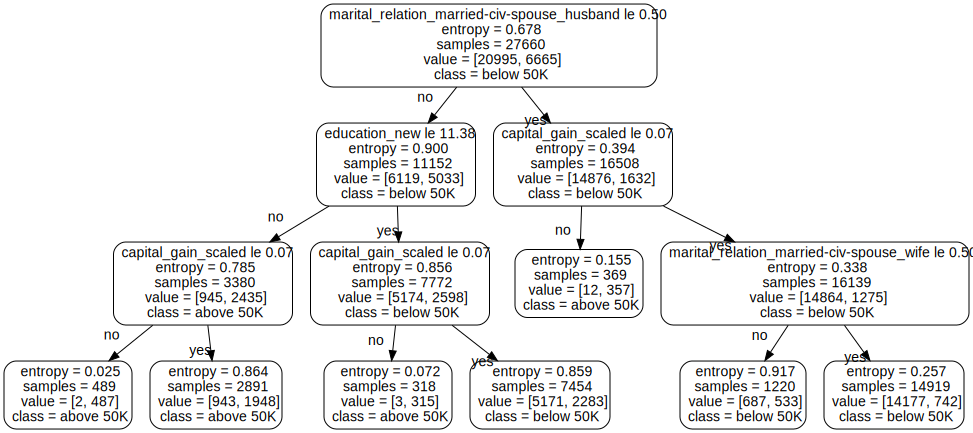

In [48]:
graph

In [49]:
graph.render('./image/my_dt', format='png')

'image/my_dt.png'

### Improving Model

In [50]:
start=time.time()
my_dt = decision_tree(new_train_data, 'income', max_depth=13, max_features = 15, min_samples_split = 500, min_samples_leaf = 250)
print(round(time.time()-start, 2), 'seconds')

79.87 seconds


### Evaluating on Test data

In [51]:
new_train_data["income"].value_counts()

0    20995
1     6665
Name: income, dtype: int64

In [52]:
### Building predict function
def tree_predict(my_dt, obs, prop):
  out_dt = my_dt
  income = ""
  while out_dt.column != "":
    if obs[out_dt.column] <= out_dt.thresh:
      out_dt = out_dt.branch_positive
    else:
      out_dt = out_dt.branch_negative
  
  if out_dt.value[1]/(out_dt.value[1] + out_dt.value[0]) >= prop:
    income = 1
  else:
    income = 0
  
  return out_dt, income

In [53]:
prop = list(np.linspace(0,1, 100))[1:-1]

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [55]:
new_test_data_use = new_test_data.reset_index(drop = True)

In [56]:
### Trying out different probability thresholds to evaluate their accuracies/metrics
def tree_pred_threshold(prop):
  incomes = []
  for i in range(len(new_test_data_use)):
    out_dt, income = tree_predict(my_dt, new_test_data_use.iloc[i,:], prop)
    incomes.append(income)

  precision = precision_score(y_test, incomes)
  recall = recall_score(y_test, incomes)
  accuracy = accuracy_score(y_test, incomes)
  
  return precision, recall, accuracy

In [57]:
precisions = []
recalls = []
accuracy = []
for i in range(len(prop)):
  res = tree_pred_threshold(prop[i])
  precisions.append(res[0])
  recalls.append(res[1])
  accuracy.append(res[2])

In [58]:
prop[np.argmax(accuracy)], accuracy[np.argmax(accuracy)]

(0.17171717171717174, 0.8159672466734903)

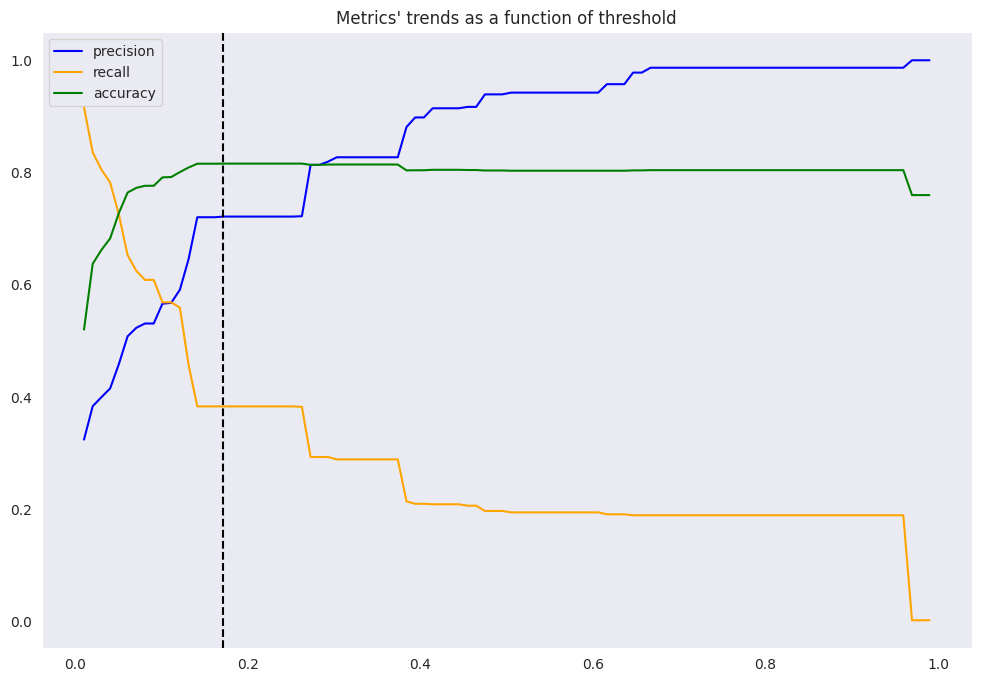

In [59]:
plt.figure(figsize = (12,8))
sns.lineplot(x = prop, y = precisions, color = "blue", label = "precision")
sns.lineplot(x = prop, y = recalls, color = "orange", label = "recall")
sns.lineplot(x = prop, y = accuracy, color = "green", label = "accuracy")
plt.axvline(x = prop[np.argmax(accuracy)], color = "black", linestyle = "dashed")
plt.title("Metrics' trends as a function of threshold")
plt.show();

In [60]:
incomes = []
out_vals = []
for i in range(len(new_test_data_use)):
  out_dt, income = tree_predict(my_dt, new_test_data_use.iloc[i,:], prop[np.argmax(accuracy)])
  incomes.append(income)
  out_vals.append(out_dt.value)

In [61]:
from collections import Counter
Counter(incomes)

Counter({0: 4260, 1: 625})

In [62]:
out_vals[:10]

[[2991, 21],
 [802, 0],
 [2991, 21],
 [84, 11],
 [1755, 30],
 [12, 357],
 [373, 59],
 [198, 1],
 [2991, 21],
 [1755, 30]]

In [63]:
out_dt, income = tree_predict(my_dt, new_test_data.iloc[1000,:], prop[np.argmax(accuracy)])

In [64]:
out_dt.value

[314, 113]

In [65]:
income

1

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [67]:
print(classification_report(y_test, incomes))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3709
           1       0.72      0.38      0.50      1176

    accuracy                           0.82      4885
   macro avg       0.78      0.67      0.69      4885
weighted avg       0.80      0.82      0.79      4885



In [68]:
conf = confusion_matrix(y_test,incomes)

<Axes: >

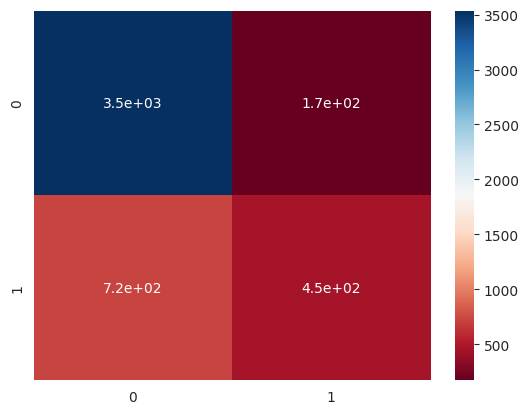

In [69]:
sns.heatmap(conf, annot = True, cmap = "RdBu")

### Column Frequency

In [70]:
from collections import Counter
col_dict = dict(Counter(my_dt.col_names))

In [71]:
col_df = pd.DataFrame({"variable": list(col_dict.keys()), "frequency": list(col_dict.values())})

In [72]:
col_df = col_df[col_df["variable"] != ""]

In [73]:
col_df

,variable,frequency
0,marital_relation_married-civ-spouse_husband,2
1,education_new,17
2,capital_gain_scaled,29
3,workclass_self-emp-not-inc,10
4,capital_loss_scaled,22
5,fnlwgt_scaled,32
6,marital_relation_married-civ-spouse_wife,2
7,workclass_?,13
8,hours_per_week_scaled,11
9,occupation_exec-managerial,12
